# Interpreting Churn Data to Figure Out what Characteristics makes Customer to Leave

###### by Dotun Opasina

### Introduction
The goal of this project is to find the most strongest features that makes particular leave an internet service provider.

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
## Method to convert Yes and No to 1 and 0
def sublst(row):
    housing_map = {'Yes': 1, 'No': 0}
    
    row = row.map(housing_map)
       
    return row

# Step 1: Data Retrieving and Cleaning

In [19]:
data = pd.read_csv('Telco-Customer-Churn.csv')


data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x) if x != " " else " ")

data['MonthlyCharges'] = data['MonthlyCharges'].apply(lambda x: float(x) if x != " " else " ")

#data.drop(columns =['TotalCharges','MonthlyCharges'])


## Remove empty columns
data = data[data['TotalCharges'] != ' ']
data = data[data['MonthlyCharges'] != ' ']
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


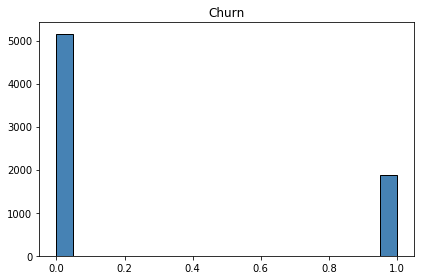

In [14]:
# Plot Churn
churn = data['Churn'].to_frame().apply(lambda x: sublst(x) )
#churn.to_csv("ChurnValues.txt", index=False)

churn.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 1.0, 1.0))  

# Step 2: Convert Columns to Categorical Variables

In [20]:
colNames = ['Partner','Dependents','PhoneService','Churn','PaperlessBilling']

data[colNames] = data[colNames].apply(lambda x: sublst(x) )
data.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
dummy_array = ["gender","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]

dummyDf = pd.DataFrame()

dummyDf = pd.get_dummies(data=data, columns=dummy_array,dummy_na=True)
dummyDf.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_nan,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_nan,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_nan
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,34,1,0,56.95,1889.5,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,0,1,0,0,0,0,0,1,0,0


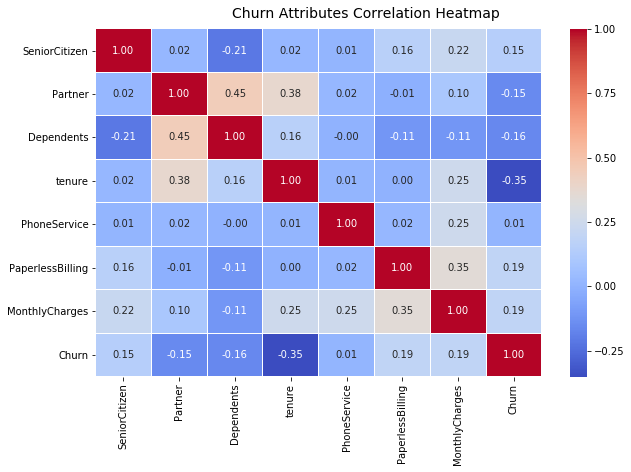

In [22]:
# Plot heatmap correlation
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Churn Attributes Correlation Heatmap', fontsize=14)

   #### We notice that the Churn is correlated with many of the features

In [23]:
# standard scale the total charges and monthly charges

cols = ['TotalCharges', 'MonthlyCharges']
subset_df = data[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = scaled_df.copy()
final_df['Churn'] = data['Churn'].apply(lambda x: "Yes" if x == 1 else "No")
final_df.head()

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalCharges,MonthlyCharges,Churn
0,-0.994194,-1.161694,No
1,-0.173740,-0.260878,No
2,-0.959649,-0.363923,Yes
3,-0.195248,-0.747850,No
4,-0.940457,0.196178,Yes


In [24]:
# Split data into Churn and Other features
Y = dummyDf["Churn"].values
X = dummyDf.drop(labels = ["Churn"],axis = 1)

## Step 3: Perform Initial Train and Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Step 4: Perform Logistic Regression on Data

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
## print accuracy score
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8095238095238095


In [29]:
### Get all the Weights of Features and Sort them 
weights = pd.Series(model.coef_[0],index=X.columns.values)
weightSorted = weights.sort_values(ascending = False)
print(weightSorted)

Contract_Month-to-month                    0.380382
InternetService_Fiber optic                0.309704
PaperlessBilling                           0.286022
PaymentMethod_Electronic check             0.282996
TechSupport_No                             0.226528
OnlineSecurity_No                          0.225877
SeniorCitizen                              0.213967
StreamingTV_Yes                            0.071678
MultipleLines_No phone service             0.055440
StreamingMovies_Yes                        0.052324
OnlineBackup_No                            0.049119
MultipleLines_Yes                          0.020658
DeviceProtection_No                        0.013780
MonthlyCharges                             0.001156
TotalCharges                               0.000308
gender_nan                                 0.000000
DeviceProtection_nan                       0.000000
MultipleLines_nan                          0.000000
InternetService_nan                        0.000000
OnlineSecuri

In [36]:
# Get the Sorted weight index and values
weightSortedIndex = weightSorted.index.values
weightSortedValues = weightSorted.values

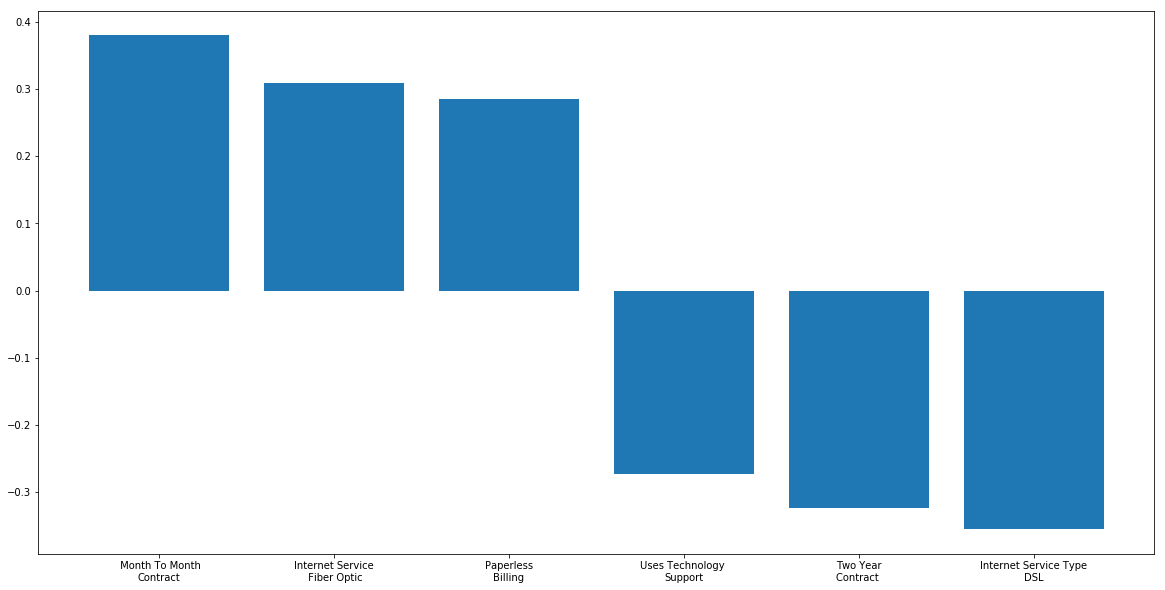

In [35]:
## Plot Result by Select Most Strongest set of features and least set of features
plt.figure(figsize=(20,10))
firstLastFiveIndex = [' Month To Month\nContract','Internet Service\n Fiber Optic','Paperless\nBilling','Uses Technology \nSupport', 'Two Year\nContract ', 'Internet Service Type\nDSL']
#np.concatenate((weightSortedIndex[:3], weightSortedIndex[-3:]), axis=None)
firstLastFiveValues = np.concatenate((weightSortedValues[:3], weightSortedValues[-3:]), axis=None)
plt.bar(firstLastFiveIndex,firstLastFiveValues )

plt.show()
